In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [41]:
df = pd.read_csv('../DATA/cancer_tumor_data_features.csv')

In [42]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
#Ручная реализация метода PCA

In [6]:
scaler = StandardScaler()

In [7]:
scaled_X = scaler.fit_transform(df)

In [14]:
#Вычисляем ковариационную матрицу
cov_matrix = np.cov(scaled_X, rowvar=False)

In [20]:
#Вычисляем собственные вектора и значения
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

In [21]:
num_components = 2

In [26]:
sorted_key = np.argsort(eigen_values)[::-1][:num_components]

In [29]:
#Оставляем вектора с наибольшими значениями собственных значений
eigen_values, eigen_vectors = eigen_values[sorted_key], eigen_vectors[:, sorted_key]

In [30]:
#Проецируем исходные данные в пространство собственных векторов
pca_values = np.dot(scaled_X, eigen_vectors)

In [31]:
pca_values

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [36]:
from sklearn.datasets import load_breast_cancer

In [37]:
remote_dict = load_breast_cancer()

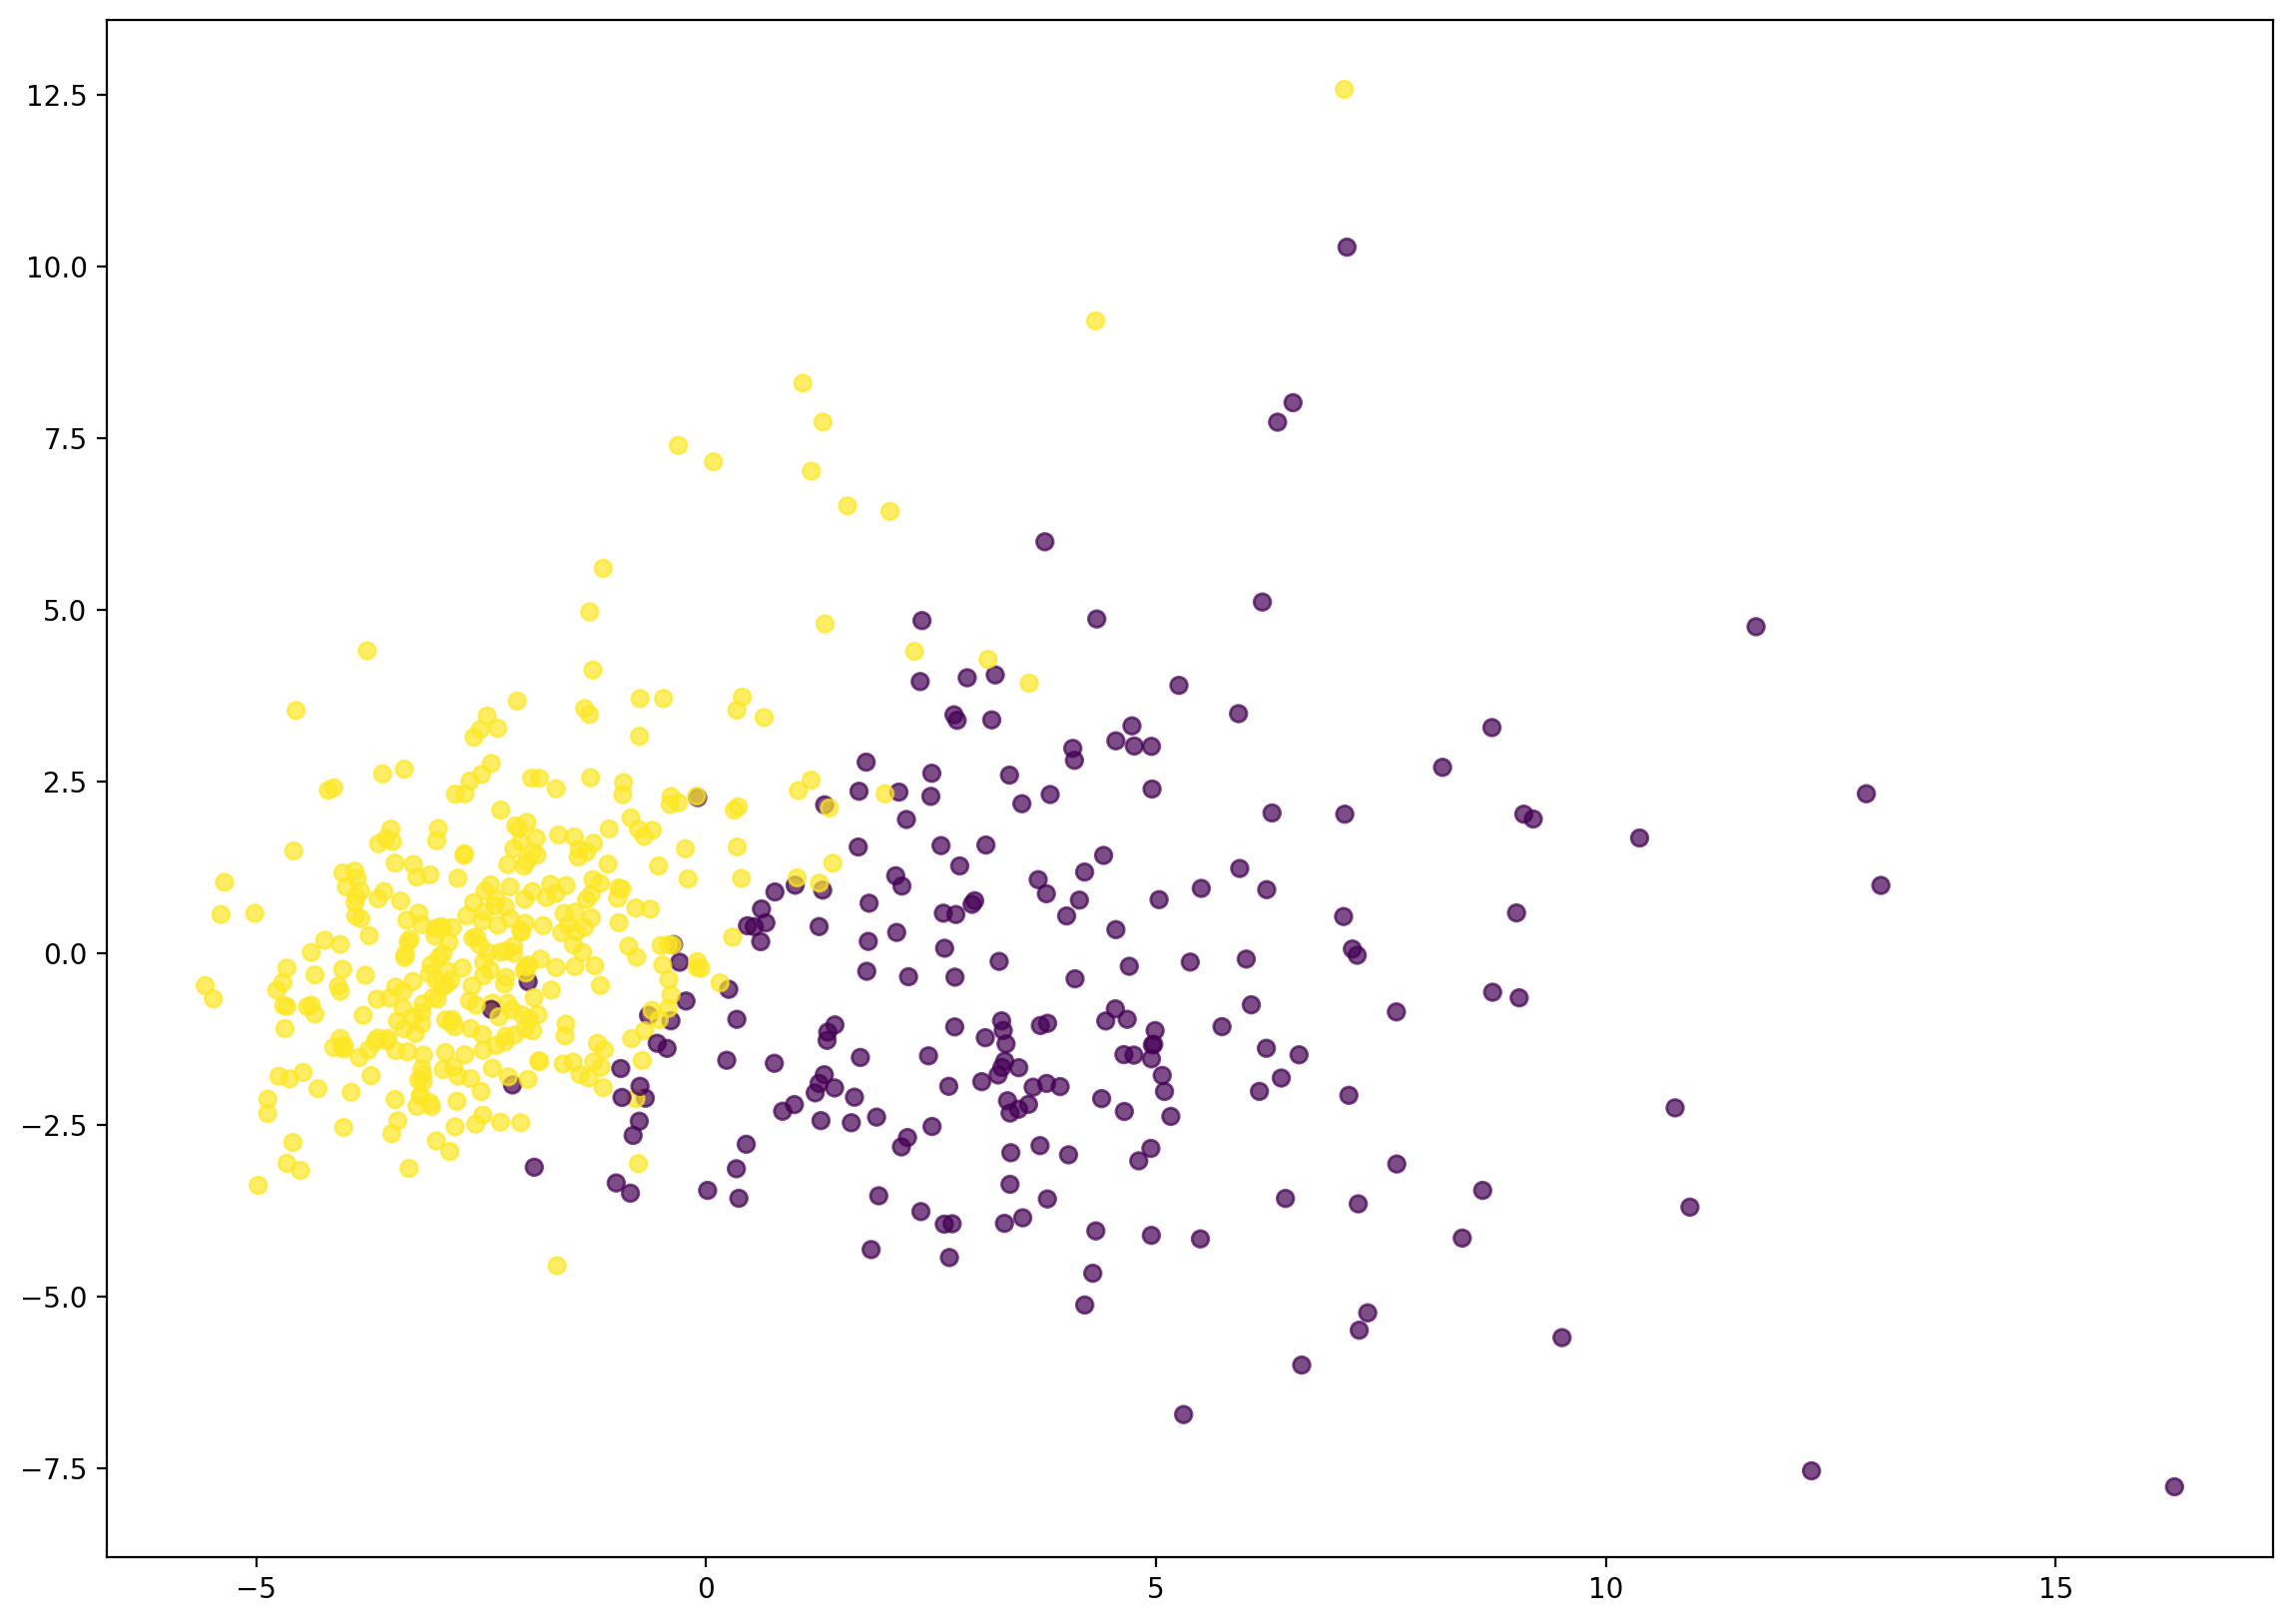

In [39]:
#Видим, что при уменьшении размерности, мы все ещё можем разделить данные по классам
plt.figure(figsize=(14,10), dpi=200)
plt.scatter(pca_values[:, 0], pca_values[:, 1], alpha=0.7, c=remote_dict['target'])

In [40]:
#PCA в Scikit_Learn

In [43]:
scaler = StandardScaler()

In [44]:
scaled_X = scaler.fit_transform(df)

In [46]:
model = PCA(n_components=2)

In [47]:
model.fit(scaled_X)

PCA(n_components=2)

In [49]:
pc_result = model.transform(scaled_X)

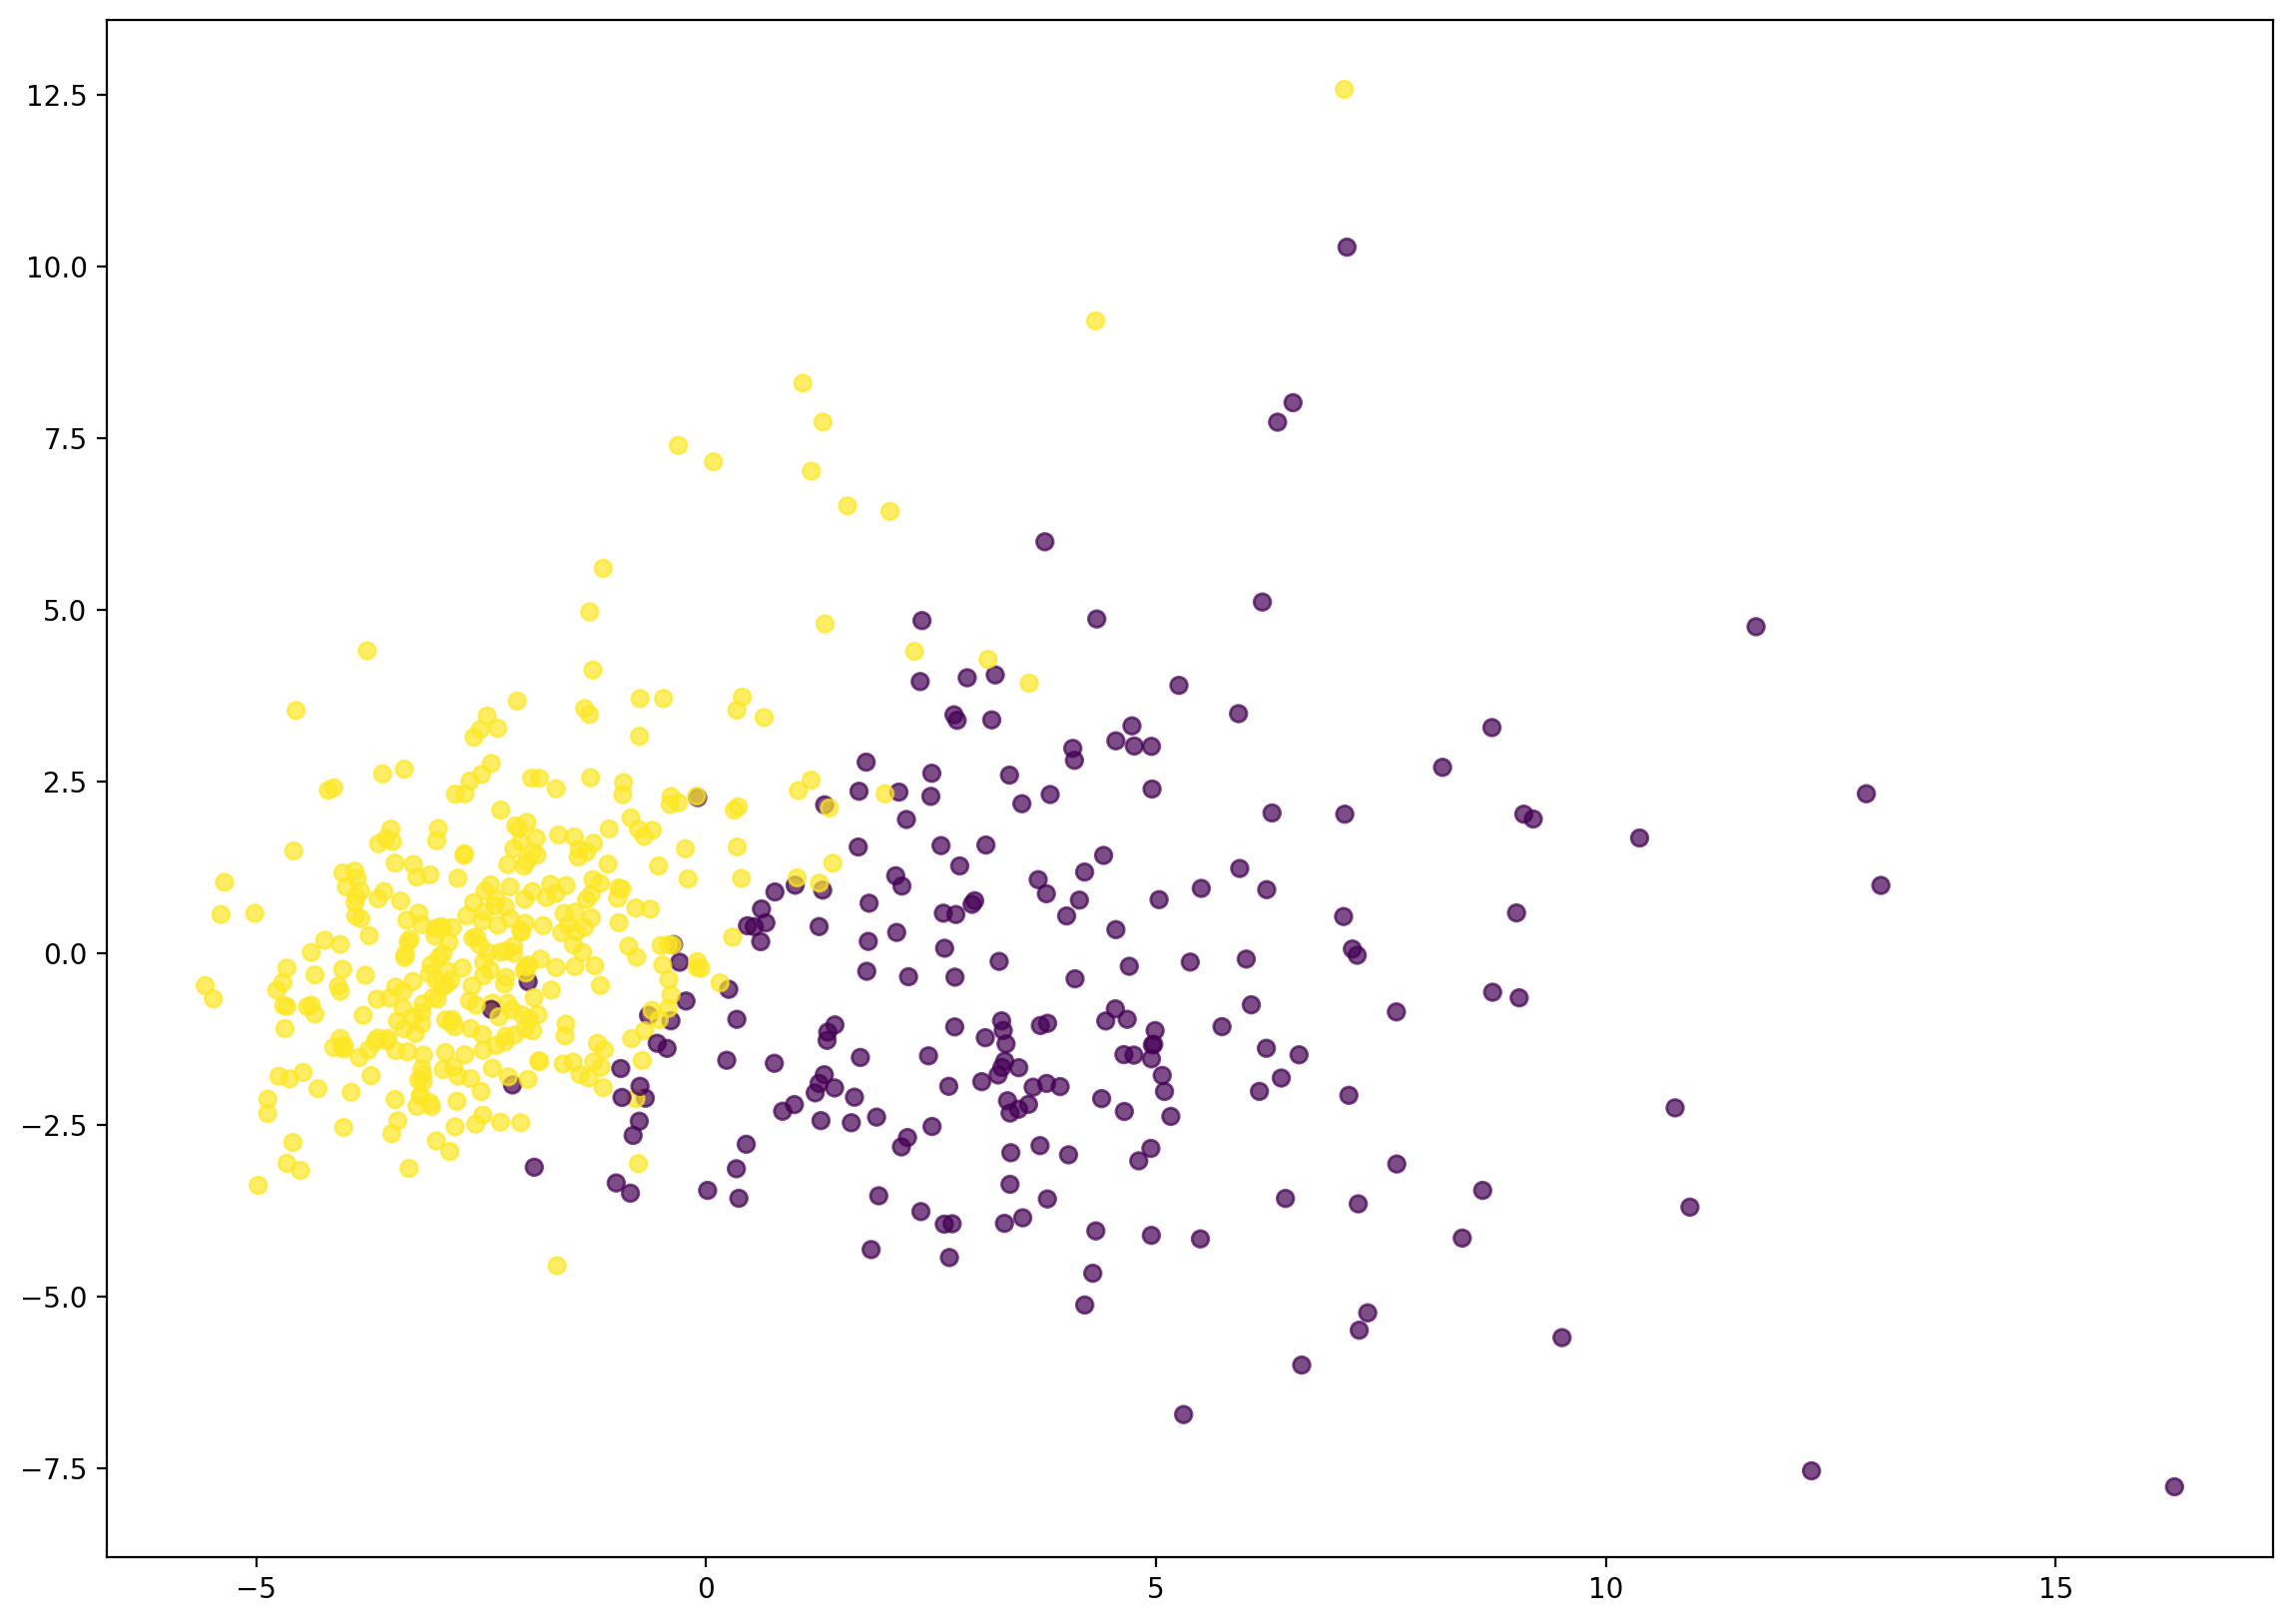

In [50]:
plt.figure(figsize=(14,10), dpi=200)
plt.scatter(pc_result[:, 0], pc_result[:, 1], alpha=0.7, c=remote_dict['target'])

In [55]:
#Направление максимальной вариативности в наших данных
df_comp = pd.DataFrame(model.components_, index=['PC1', 'PC2'], columns=df.columns)

<Axes: >

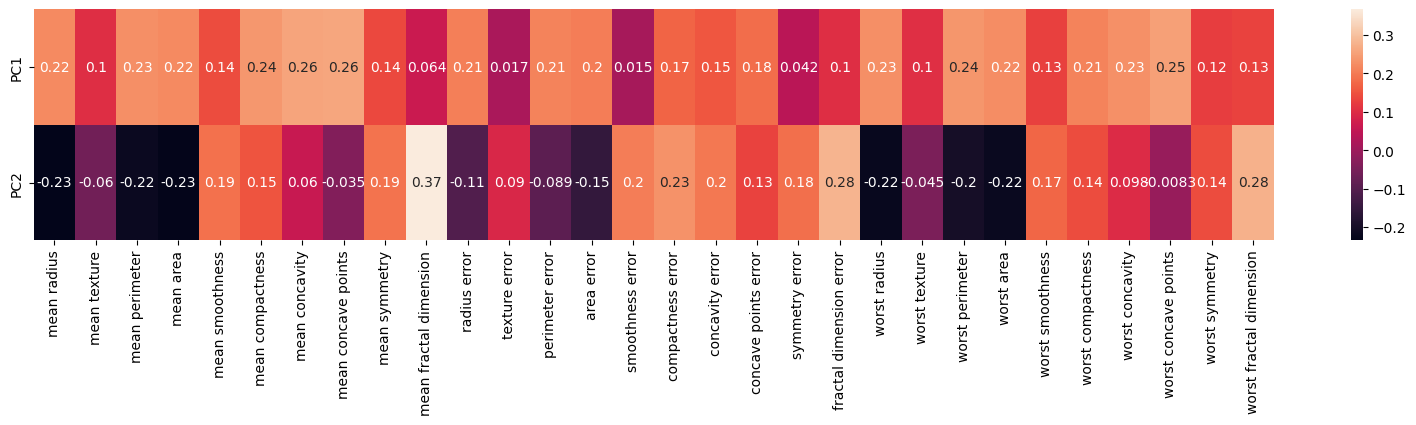

In [57]:
plt.figure(figsize=(20,3))
sns.heatmap(df_comp, annot=True)

In [58]:
model.explained_variance_ratio_ #Вариативность каждого ко

array([0.44272026, 0.18971182])

In [59]:
comp_amount = []
for comp in range(1, 31):
    model = PCA(n_components=comp)
    model.fit(scaled_X)
    comp_amount.append(np.sum(model.explained_variance_ratio_))

(0.0, 1.1)

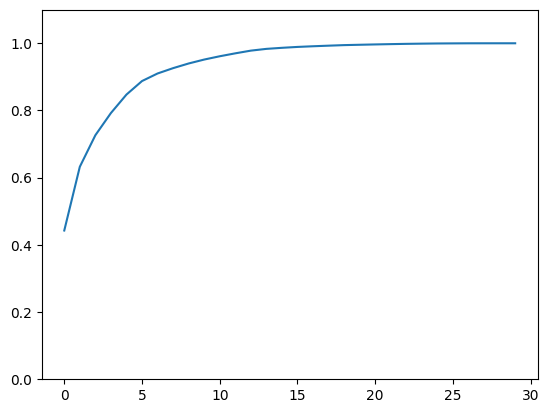

In [62]:
plt.plot(comp_amount)
plt.ylim(0,1.1)